<h1>Jeff Pinegar </h1>
<em><h3>SQLAlchemy Challenge</h3></em>
Dec 7, 2022 <br>
jeffpinegar1@gmail.com <br>
717-982-0516 <br>

### Bonus: Temperature Analysis II

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Location = Base.classes.station
Measurement = Base.classes.measurement

In [6]:
# View all of the classes that automap found
# this command will identify the schema in your database
from sqlalchemy import inspect
inspector = inspect(engine)
schemas = inspector.get_schema_names()

# Find the schema of the database
for schema in schemas:
    print("schema: %s" % schema)
    for table_name in inspector.get_table_names(schema=schema):
        print(table_name)
        for column in inspector.get_columns(table_name, schema=schema):
            print("Column: %s" % column)

schema: main
measurement
Column: {'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
Column: {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
Column: {'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
Column: {'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
Column: {'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
station
Column: {'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
Column: {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
Column: {'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
Col

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [8]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# You want to take a trip from August 1 to August 7 of this year
# Use the `calc_temps` function to calculate the minimum, average, and maximum temperatures for your trip using 
# the matching dates from a previous year (for example, use "2017-08-01").

triptemp = (calc_temps('2017-08-01', '2017-08-07'))
print(temp_2016)

[(56.0, 74.14421827631008, 84.0)]


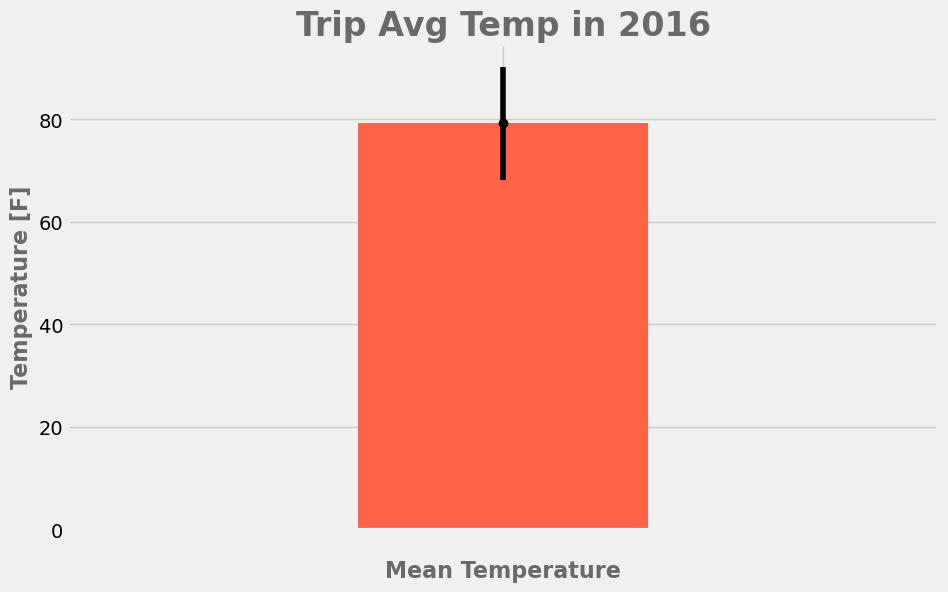

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots(figsize=(10, 6), sharey=True)

plt.title('Trip Avg Temp in 2016',
         fontsize = 24,
         color = 'dimgray',
         fontweight="bold")

plt.xlabel('Mean Temperature',
          fontsize = 16,
          color = 'dimgray',
          fontweight = 'bold')

plt.ylabel('Temperature [F]',
          fontsize = 16,
          color = 'dimgray',
          fontweight = 'bold')

ax.set_xlim(-.15, .15)
ax.bar(' ',triptemp[0][1], color = 'tomato', width=0.1)
ax.errorbar(' ',triptemp[0][1],yerr=(triptemp[0][2] - triptemp[0][0]), color = 'black', fmt='o' )

#plt.xticks(rotation = 0, fontsize=16)
# save the figure
save_fig1 = os.path.join('.', 'Output', 'Bonus_2_average_temp.jpg')
plt.savefig(save_fig1, bbox_inches='tight')

### Daily Rainfall Average

In [24]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.station, Measurement.prcp).\
    filter (Measurement.date >= '2017-08-01').\
    filter (Measurement.date <= '2017-08-07').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(data, columns =['Date', 'Station', 'Prcp'])
dfi = df.set_index('Date')
# Sort the dataframe by date
dfi.sort_index(inplace = True, ascending=True)
dfi = dfi.dropna(how='any')

dfi.head()

,Station,Prcp
Date,,
2017-08-01,USC00519397,0.02
2017-08-01,USC00514830,0.12
2017-08-01,USC00519523,0.00
2017-08-02,USC00514830,0.05
2017-08-02,USC00516128,0.25


### Daily Temperature Normals

In [12]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [13]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates


# Strip off the year and save a list of strings in the format %m-%d


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.


In [14]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [15]:
# Plot the daily normals as an area plot with `stacked=False`

## Close Session